In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("Drug200.csv")

In [6]:
data.head(4)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX


In [7]:
data.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [66]:
data.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [8]:
data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [9]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [10]:
data['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


<Figure size 864x288 with 0 Axes>

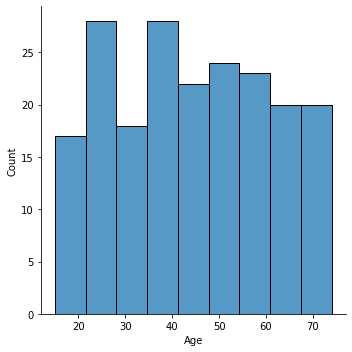

In [14]:
plt.figure(figsize=(12,4))
sns.displot(data.Age)
plt.show()

In [16]:
data.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

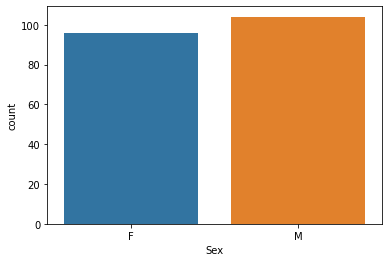

In [19]:
sns.countplot(x=data.Sex)

In [20]:
data.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

<AxesSubplot:xlabel='BP', ylabel='count'>

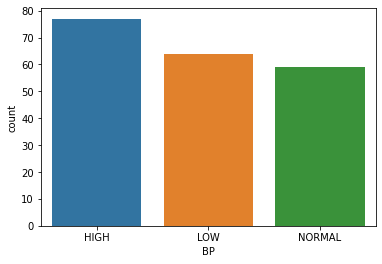

In [21]:
sns.countplot(x=data.BP)

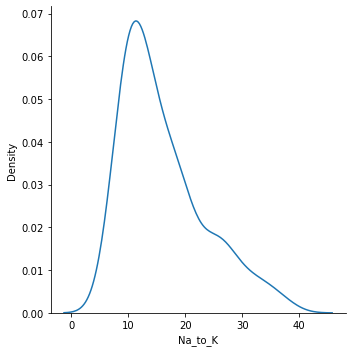

In [27]:
sns.displot(x=data.Na_to_K,kind='kde')

<AxesSubplot:xlabel='Drug', ylabel='count'>

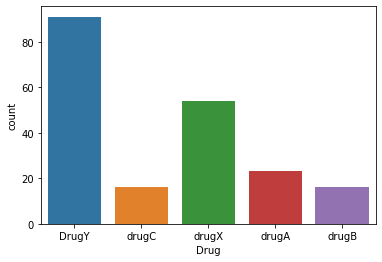

In [30]:
sns.countplot(x=data.Drug)

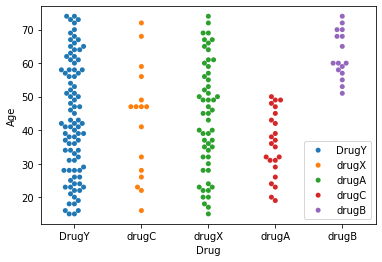

In [36]:
sns.swarmplot(x=data.Drug,y=data.Age)
plt.legend(data.Drug.value_counts().index)

In [37]:
data.Age[data.Drug=='DrugY'].min()

15

In [40]:
data.Age[data.Drug=='drugB'].max()

74

In [45]:
data_sex_Drug=data.groupby(['Drug','Sex']).size()

In [46]:
data_sex_Drug

Drug   Sex
DrugY  F      47
       M      44
drugA  F       9
       M      14
drugB  F       6
       M      10
drugC  F       7
       M       9
drugX  F      27
       M      27
dtype: int64

<AxesSubplot:xlabel='Drug', ylabel='count'>

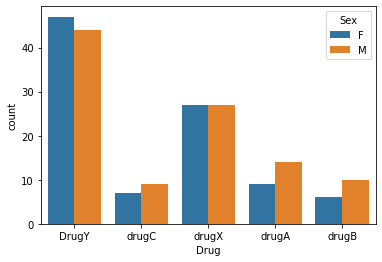

In [49]:
sns.countplot(x=data.Drug,hue='Sex',data=data)

In [61]:
data_BP=data.groupby(['Drug','BP']).size().reset_index(name='Count')

In [62]:
data_BP

,Drug,BP,Count
0,DrugY,HIGH,38
1,DrugY,LOW,30
2,DrugY,NORMAL,23
3,drugA,HIGH,23
4,drugB,HIGH,16
5,drugC,LOW,16
6,drugX,LOW,18
7,drugX,NORMAL,36


<AxesSubplot:xlabel='Drug', ylabel='Count'>

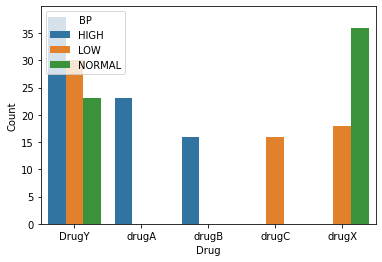

In [63]:
sns.barplot(x='Drug',y='Count',hue='BP',data=data_BP)

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

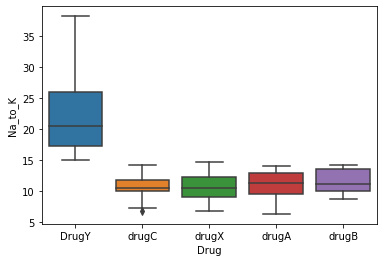

In [65]:
sns.boxplot(x='Drug',y='Na_to_K',data=data)

In [81]:
data.groupby(['Drug'])[['Na_to_K']].max()

,Na_to_K
Drug,
DrugY,38.247
drugA,13.972
drugB,14.239
drugC,14.160
drugX,14.642


In [83]:
d=data.groupby(['Drug','Cholesterol']).size().reset_index(name='count')

In [84]:
d

,Drug,Cholesterol,count
0,DrugY,HIGH,47
1,DrugY,NORMAL,44
2,drugA,HIGH,12
3,drugA,NORMAL,11
4,drugB,HIGH,8
5,drugB,NORMAL,8
6,drugC,HIGH,16
7,drugX,HIGH,20
8,drugX,NORMAL,34


<AxesSubplot:xlabel='Drug', ylabel='count'>

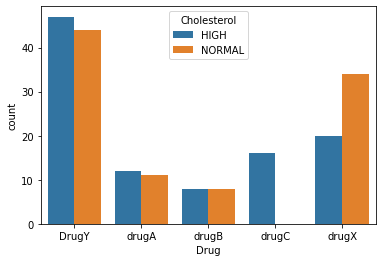

In [85]:
sns.barplot(x='Drug',y='count',hue='Cholesterol',data=d)

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

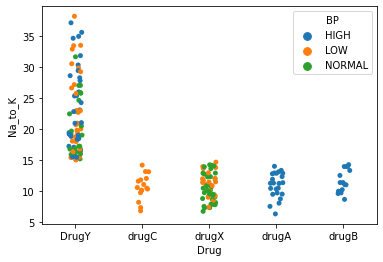

In [87]:
sns.stripplot(x='Drug',y='Na_to_K',hue='BP',data=data)

In [88]:
highnatok=data.Na_to_K.apply(lambda x:1 if x>15 else 0)
highratio=pd.Series(highnatok,name='highnatok')
d1=pd.concat([data,highratio],axis=1)

In [92]:
d1.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,highnatok
0,23,F,HIGH,HIGH,25.355,DrugY,1
1,47,M,LOW,HIGH,13.093,drugC,0
2,47,M,LOW,HIGH,10.114,drugC,0
3,28,F,NORMAL,HIGH,7.798,drugX,0
4,61,F,LOW,HIGH,18.043,DrugY,1


<AxesSubplot:xlabel='Drug', ylabel='Age'>

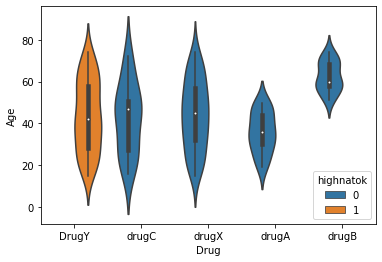

In [94]:
sns.violinplot(x='Drug',y='Age',hue='highnatok',data=d1)

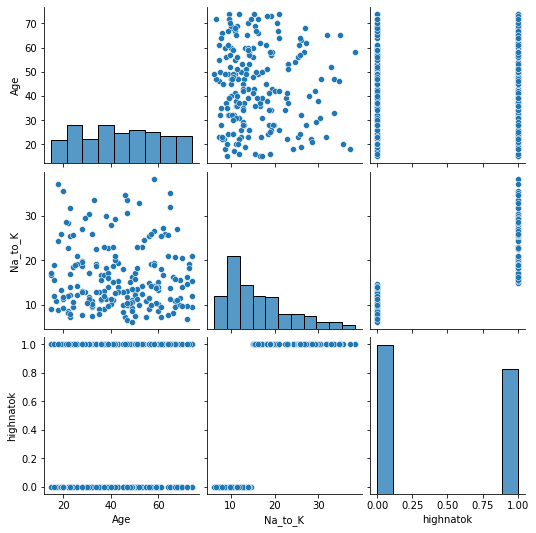

In [95]:
sns.pairplot(d1)

In [96]:
d1.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
highnatok        int64
dtype: object

In [101]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([('ohe',OneHotEncoder(drop='first'),['Sex']),
                     ('oe',OrdinalEncoder(),['BP','Cholesterol'])],remainder='passthrough')

In [104]:
d2=ct.fit_transform(d1)
print(d1.head(15))
d2[:15]

    Age Sex      BP Cholesterol  Na_to_K   Drug  highnatok
0    23   F    HIGH        HIGH   25.355  DrugY          1
1    47   M     LOW        HIGH   13.093  drugC          0
2    47   M     LOW        HIGH   10.114  drugC          0
3    28   F  NORMAL        HIGH    7.798  drugX          0
4    61   F     LOW        HIGH   18.043  DrugY          1
5    22   F  NORMAL        HIGH    8.607  drugX          0
6    49   F  NORMAL        HIGH   16.275  DrugY          1
7    41   M     LOW        HIGH   11.037  drugC          0
8    60   M  NORMAL        HIGH   15.171  DrugY          1
9    43   M     LOW      NORMAL   19.368  DrugY          1
10   47   F     LOW        HIGH   11.767  drugC          0
11   34   F    HIGH      NORMAL   19.199  DrugY          1
12   43   M     LOW        HIGH   15.376  DrugY          1
13   74   F     LOW        HIGH   20.942  DrugY          1
14   50   F  NORMAL        HIGH   12.703  drugX          0


array([[0.0, 0.0, 0.0, 23, 25.355, 'DrugY', 1],
       [1.0, 1.0, 0.0, 47, 13.093, 'drugC', 0],
       [1.0, 1.0, 0.0, 47, 10.114, 'drugC', 0],
       [0.0, 2.0, 0.0, 28, 7.798, 'drugX', 0],
       [0.0, 1.0, 0.0, 61, 18.043, 'DrugY', 1],
       [0.0, 2.0, 0.0, 22, 8.607, 'drugX', 0],
       [0.0, 2.0, 0.0, 49, 16.275, 'DrugY', 1],
       [1.0, 1.0, 0.0, 41, 11.037, 'drugC', 0],
       [1.0, 2.0, 0.0, 60, 15.171, 'DrugY', 1],
       [1.0, 1.0, 1.0, 43, 19.368, 'DrugY', 1],
       [0.0, 1.0, 0.0, 47, 11.767, 'drugC', 0],
       [0.0, 0.0, 1.0, 34, 19.199, 'DrugY', 1],
       [1.0, 1.0, 0.0, 43, 15.376, 'DrugY', 1],
       [0.0, 1.0, 0.0, 74, 20.942, 'DrugY', 1],
       [0.0, 2.0, 0.0, 50, 12.703, 'drugX', 0]], dtype=object)

In [105]:
X=d1.drop(['Drug'],axis=1)

In [106]:
y=d1['Drug']

In [107]:
X

,Age,Sex,BP,Cholesterol,Na_to_K,highnatok
0,23,F,HIGH,HIGH,25.355,1
1,47,M,LOW,HIGH,13.093,0
2,47,M,LOW,HIGH,10.114,0
3,28,F,NORMAL,HIGH,7.798,0
4,61,F,LOW,HIGH,18.043,1
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,0
196,16,M,LOW,HIGH,12.006,0
197,52,M,NORMAL,HIGH,9.894,0
198,23,M,NORMAL,NORMAL,14.020,0


In [108]:
y

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [109]:
xnew=ct.fit_transform(X)

In [110]:
xnew

array([[ 0.   ,  0.   ,  0.   , 23.   , 25.355,  1.   ],
       [ 1.   ,  1.   ,  0.   , 47.   , 13.093,  0.   ],
       [ 1.   ,  1.   ,  0.   , 47.   , 10.114,  0.   ],
       ...,
       [ 1.   ,  2.   ,  0.   , 52.   ,  9.894,  0.   ],
       [ 1.   ,  2.   ,  1.   , 23.   , 14.02 ,  0.   ],
       [ 0.   ,  1.   ,  1.   , 40.   , 11.349,  0.   ]])

In [111]:
from sklearn.model_selection import train_test_split


In [121]:
X_train, X_test, y_train, y_test = train_test_split(xnew, y, test_size=0.33, random_state=42)

In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold,cross_val_score

In [123]:
skfold=StratifiedKFold(n_splits=5)

In [127]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression(solver='liblinear')
l.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [128]:
lr=cross_val_score(l,X_train,y_train,cv=skfold)

In [129]:

lrpred=l.predict(X_test)

In [133]:
print(lr)
lr.mean()

[0.88888889 0.92592593 0.92592593 0.88888889 0.88461538]


0.9028490028490029

In [138]:
lrtestscore=l.score(X_test,y_test)

In [139]:
lrtestscore

0.8636363636363636

In [140]:
result_train={}
reuslt_test={}

In [141]:
result_train['lr train score']=np.mean(lr)
reuslt_test['lr test score']=lrtestscore

In [142]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=5)
rfc.fit(X_train,y_train)
rfc_trainscore=cross_val_score(rfc,X_train,y_train,cv=skfold)

In [143]:
rfc_trainscore

array([0.92592593, 0.92592593, 0.92592593, 0.85185185, 1.        ])

In [149]:
rfc_pred=rfc.predict(X_test)
rfc_pred

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'DrugY', 'drugA',
       'drugB', 'DrugY', 'drugB', 'drugX', 'drugX', 'DrugY', 'drugB',
       'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX',
       'DrugY', 'drugX', 'DrugY', 'drugC', 'drugC', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'drugA', 'DrugY', 'drugA', 'drugX', 'drugX',
       'drugX', 'DrugY', 'DrugY', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY',
       'drugA', 'DrugY', 'DrugY', 'DrugY', 'drugA', 'DrugY', 'drugB',
       'DrugY', 'drugX', 'DrugY'], dtype=object)

In [144]:
rfc_trainscore.mean()

0.9259259259259259

In [146]:
rfc_testscore=rfc.score(X_test,y_test)

In [147]:
rfc_testscore

0.9696969696969697

In [150]:
result_train['rfc_train_score']=np.mean(rfc_trainscore)
reuslt_test['rfc_test_score']=rfc_testscore

In [151]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10,p=1)
knn.fit(X_train,y_train)
knn_trainscores=cross_val_score(knn,X_train,y_train,cv=skfold)
knn_trainscores

array([0.66666667, 0.77777778, 0.74074074, 0.66666667, 0.80769231])

In [152]:
knn_pred=knn.predict(X_test)

In [153]:
knn_testscores=knn.score(X_test,y_test)

In [154]:
knn_testscores

0.7575757575757576

In [155]:
result_train['knn_train_score']=np.mean(knn_trainscores)
reuslt_test['knn_test_scores']=knn_testscores

In [158]:
from sklearn.svm import SVC
svc=SVC(kernel='linear',C=0.05,gamma=0.5)
svc.fit(X_train,y_train)
svc_train_scores=cross_val_score(svc,X_train,y_train,cv=skfold)
svc_train_scores

array([0.88888889, 0.88888889, 0.92592593, 0.88888889, 0.88461538])

In [159]:
svc_pred=svc.predict(X_test)

In [160]:
svc_testscores=svc.score(X_test,y_test)

In [161]:
svc_testscores

0.8787878787878788

In [162]:
svc_train_scores.mean()

0.8954415954415953

In [163]:
result_train['svc_train_score']=np.mean(svc_train_scores)
reuslt_test['svc_test_score']=svc_testscores

In [164]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(X_train,y_train)
gb_train_scores=cross_val_score(gb,X_train,y_train,cv=skfold)
gb_train_scores

array([1.        , 1.        , 1.        , 0.96296296, 1.        ])

In [165]:
gb_train_scores.mean()

0.9925925925925926

In [166]:
gb_pred=gb.predict(X_test)

In [167]:
gb_test_score=gb.score(X_test,y_test)

In [168]:
gb_test_score


1.0

In [169]:
result_train['gb_train_score']=np.mean(gb_train_scores)
reuslt_test['gb_test_score']=gb_test_score

In [170]:
result_train

{'lr train score': 0.9028490028490029,
 'rfc_train_score': 0.9259259259259259,
 'knn_train_score': 0.7319088319088319,
 'svc_train_score': 0.8954415954415953,
 'gb_train_score': 0.9925925925925926}

In [175]:
test_result=pd.DataFrame.from_dict(reuslt_test,orient='index',columns=['testscore'])

In [176]:
test_result

,testscore
lr test score,0.863636
rfc_test_score,0.969697
knn_test_scores,0.757576
svc_test_score,0.878788
gb_test_score,1.000000


In [182]:
train_result=pd.DataFrame.from_dict(result_train,orient='index',columns=['trainscore'])

In [183]:
train_result

,trainscore
lr train score,0.902849
rfc_train_score,0.925926
knn_train_score,0.731909
svc_train_score,0.895442
gb_train_score,0.992593


In [178]:
grid={
    'C':[0.01,0.02,0.03],
    'kernel':['linear','poly','rbf','sigmoid'],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
svmg=SVC()
svm_cv=GridSearchCV(svmg,grid,cv=5)
svm_cv.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.02, 0.03], 'degree': [1, 3, 5, 7],
                         'gamma': [0.01, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [179]:
svm_cv.best_params_

{'C': 0.01, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}

In [180]:
svm_cv.best_score_

0.9324786324786324

In [181]:
svm_cv.score(X_test,y_test)

0.9545454545454546

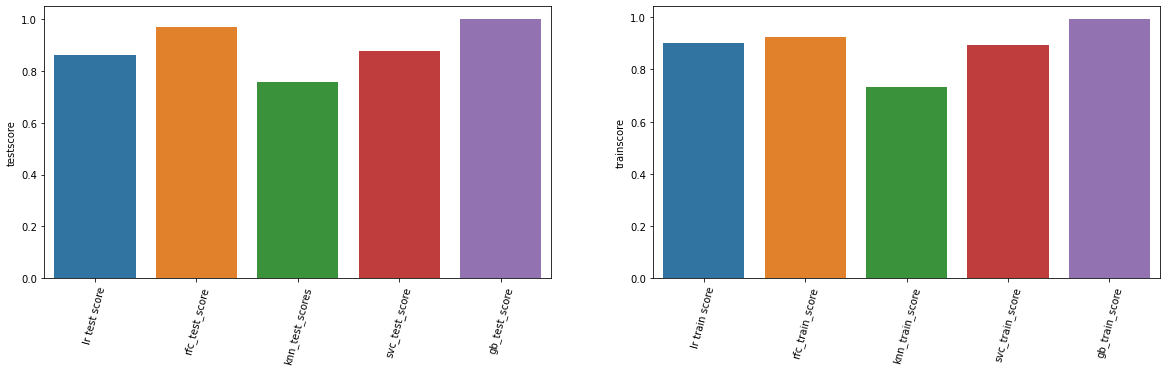

In [185]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=test_result.index,y=test_result.testscore,ax=ax[0])
sns.barplot(x=train_result.index,y=train_result.trainscore,ax=ax[1])
ax[0].set_xticklabels(test_result.index,rotation=75)
ax[1].set_xticklabels(train_result.index,rotation=75)
plt.show()